In [1]:
import pandas as pd

# 读取文件
file_path = "WY_计算随访时间_cataract_更新的截止时间.csv"
df = pd.read_csv(file_path)

# ===========================================
# 字段标准化映射表（原始字段 → 统一字段）
# ===========================================
column_mapping = {
    # 1. 人口学与社会经济学特征
    "sex": "sex",
    "ethnic_background": "ethnic_background",
    "ethnic_l": "ethnic_l",
    "ethnic": "ethnic",
    "education_bl": "education_baseline",
    "age_bl": "age_baseline",

    # 2. 生活方式与行为因素
    "csmoking_bl": "smoking_status_baseline",
    "alcohol_freq_bl": "alcohol_frequency_baseline",
    "alcohol_bl": "alcohol_frequency_baseline1",
    "sleep_dur_bl": "sleep_duration_baseline",

    # 3. 人体测量学指标
    "bmi_bl": "bmi_baseline",
    "obesity": "obesity_status",

    # 4. 基线健康状况
    "diabetes_bl": "diabetes_baseline",
    "hypertension_bl": "hypertension_baseline",
    "heart_attack_bl": "myocardial_infarction_baseline",
    "heart_failure_bl": "heart_failure_baseline",
    "stroke_bl": "stroke_baseline",
    "kidney_stone_bl": "kidney_stone_baseline",
    "depression_bl": "depression_baseline",
    "cancer_bl": "cancer_baseline",
    "heart_disease": "heart_disease_composite",

    # 5. 眼科疾病基线状态
    "amd_bl": "amd_baseline",
    "amd_bl1": "amd_baseline1",
    "amd_blt": "amd_baseline2",
    "cataract_bl": "cataract_baseline",
    "glaucoma_bl": "glaucoma_baseline",
    "gla_blt": "glaucoma_baseline1",
    "diabetic_eye_bl": "diabetic_retinopathy_baseline",
    "dr_bl": "diabetic_retinopathy_baseline",
    "dr_blt": "diabetic_retinopathy_baseline",

    # 6. 实验室检测指标
    "hba1c_bl": "hba1c_baseline",
    "total_cholesterol": "total_cholesterol",
    "ldl_cholesterol": "ldl_cholesterol",
    "hdl_cholesterol": "hdl_cholesterol",
    "triglycerides": "triglycerides",

    # 7. 脂肪酸代谢指标
    "total_fa": "fatty_acids_total",
    "n3fa": "fatty_acids_n3",
    "n6fa": "fatty_acids_n6",
    "pufa": "fatty_acids_pufa",
    "mufa": "fatty_acids_mufa",
    "sfa": "fatty_acids_sfa",
    "la": "fatty_acids_la",
    "dha": "fatty_acids_dha",

    # 8. 遗传风险评分
    "n3fa_grs": "grs_n3fa",
    "n6fa_grs": "grs_n6fa",
    "pufa_grs": "grs_pufa",
    "tfa_grs": "grs_total_fa",

    # 9. 年龄分层分类
    "age_layer2": "age_quantile_2",
    "age50": "age_threshold_50",
    "age57": "age_threshold_57",
    "age60": "age_threshold_60",

    # 10. 随访与时间变量
    "date_interview": "interview_date",
    "date_interview_time": "interview_date",
    "lastdate": "last_followup_date",
    "followup_cataract_yrs": "followup_duration_cataract",
    "followup_cataract": "followup_duration_cataract",
    "followup_cataract_182": "followup_duration_cataract",
    "followdate_cataract": "followup_date_cataract",
    "eligible": "eligible_status",

    # 11. 疾病发病与结局事件
    "amd_onset": "amd_onset_date",
    "amd_onset_date": "amd_onset_date",
    "amd_onset_time": "amd_onset_date",
    "amd_days": "amd_time_to_event_days",
    "cataract_onset": "cataract_onset_date",
    "cataract_onset_date": "cataract_onset_date",
    "cataract_days": "cataract_time_to_event_days",
    "incident_cataract": "cataract_incident",
    "diabetic_eye_onset": "diabetic_eye_onset_date",
    "diabetic_eye_onset_date": "diabetic_eye_onset_date",
    "diabetic_eye_days": "diabetic_eye_time_to_event_days",
    "glaucoma_onset": "glaucoma_onset_date",
    "glaucoma_onset_date": "glaucoma_onset_date",
    "glaucoma_days": "glaucoma_time_to_event_days",

    # 12. 模型输出
    "amd_prediction": "amd_risk_prediction",
    "cataract_prediction": "cataract_risk_prediction",
    "diabetic_eye_prediction": "diabetic_eye_risk_prediction",
    "glaucoma_prediction": "glaucoma_risk_prediction",

    # 13. 数据管理标识
    "f_eid": "participant_id",
    "analysis_fa": "analysis_flag_fatty_acids",
    "metabolomic_age": "metabolomic_age",
}

# ==================================================
# 自动将 df 的列名映射到新名称（若存在）
# ==================================================
df = df.rename(columns={orig: new for orig, new in column_mapping.items() if orig in df.columns})

# 输出前 5 行，确认成功读取
print(df.head())

# 输出列名，确认字段统一
print("\n统一后的字段名：")
print(df.columns.tolist())


   ethnic_background  sex  education_baseline  sleep_duration_baseline  \
0               1001    1                   1                        7   
1               1002    1                   3                        7   
2               1001    1                   0                        7   
3               1001    0                   5                        8   
4               1001    1                   0                       12   

   smoking_status_baseline  alcohol_frequency_baseline  bmi_baseline  \
0                      2.0                         3.0          27.2   
1                      2.0                         3.0          22.8   
2                      0.0                         2.0          28.6   
3                      0.0                         5.0          34.0   
4                      2.0                         6.0          20.0   

   age_baseline  diabetes_baseline  cancer_baseline  ...  \
0            43                  0              0.0  ...   
1 

步骤0 - 初始人数: 174,614 人

【步骤1 - 排除早已发病(<183 天)】
排除前: 174,614 人
排除后: 164,453 人
减少人数: 10,161 人

【步骤2 - 筛选脂肪酸数据完整的人群】
脂肪酸列: ['fatty_acids_total', 'fatty_acids_n3', 'fatty_acids_n6', 'fatty_acids_pufa', 'fatty_acids_mufa', 'fatty_acids_sfa', 'fatty_acids_la', 'fatty_acids_dha']
筛选前: 164,453 人
筛选后: 35,648 人
减少人数: 128,805 人

【步骤3 - 筛选最终有效人群】
保留: >=183天（晚期发病组）和空值（未发病组）
排除: <183天（早期发病组）
筛选前: 35,648 人
筛选后: 35,648 人
减少人数: 0 人

【步骤4 - 创建分组变量】
发病组(>=183天): 3,770 人
对照组(空值): 31,878 人
总计: 35,648 人
发病组内：早期(<183天)=0，晚期(>=183天)=3,770

⚠️  发现缺失值:
age_baseline                 0
sex                          0
smoking_status_baseline    162
dtype: int64
正在剔除含缺失值的记录...
清理前: 35,648 人
清理后: 35,486 人
减少人数: 162 人

【倾向评分模型】
模型系数: {'age': np.float64(1.0041231721093755), 'sex': np.float64(-0.14653385624517842), 'smoking_status_baseline': np.float64(0.02224473591481551)}
模型截距: -2.4877
模型样本数: 35,486

【OR值解读】
age: OR=2.73
sex: OR=0.86
smoking_status_baseline: OR=1.02

【开始1:1最近邻匹配】
卡尺值: 0.1
成功匹配对数: 3744
匹配后总样本数: 7,488
病例组

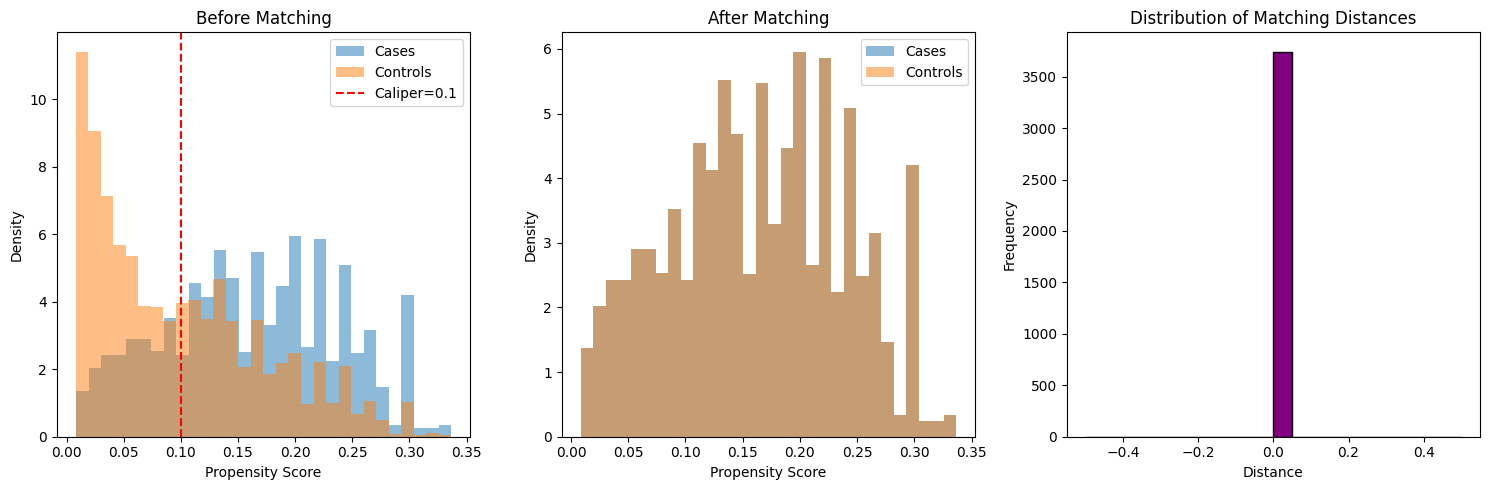

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# =================================================
# 1. 数据准备与分组
# =================================================
# 步骤0: 打印初始人数（基于最原始的数据）
initial_n = len(df)
print(f"=" * 65)
print(f"步骤0 - 初始人数: {initial_n:,} 人")
print("=" * 65)

# 创建二分类变量：是否发病
cataract_days_col = 'cataract_time_to_event_days'

if cataract_days_col not in df.columns:
    print(f"❌ 错误：列 '{cataract_days_col}' 不存在！")
else:
    # =================================================
    # 步骤1: 第一步就筛选掉早已发病的记录 (cataract_days < 183)
    # =================================================
    print("\n【步骤1 - 排除早已发病(<183 天)】")
    pre_step1_n = len(df)
    
    # 直接排除所有 cataract_days < 183 的记录
    df_step1 = df[~(df[cataract_days_col] < 183)].copy()
    
    after_step1_n = len(df_step1)
    removed_step1_n = pre_step1_n - after_step1_n
    
    print(f"排除前: {pre_step1_n:,} 人")
    print(f"排除后: {after_step1_n:,} 人")
    print(f"减少人数: {removed_step1_n:,} 人")
    print("=" * 65)
    
    # =================================================
    
    # 步骤2: 去掉脂肪酸数据不完整的，创建 df_fa_complete
    # =================================================
    print("\n【步骤2 - 筛选脂肪酸数据完整的人群】")
    
    # 定义脂肪酸核心列
    fa_core_cols = ['fatty_acids_total', 'fatty_acids_n3', 'fatty_acids_n6',
                    'fatty_acids_pufa', 'fatty_acids_mufa', 'fatty_acids_sfa',
                    'fatty_acids_la', 'fatty_acids_dha']
    
    # 检查哪些列实际存在
    existing_fa_core = [col for col in fa_core_cols if col in df_step1.columns]
    
    if not existing_fa_core:
        print("⚠️  警告：未找到任何脂肪酸数据列！")
    
    pre_step2_n = len(df_step1)
    
    # 剔除脂肪酸数据不完整的记录 
    df_fa_complete = df_step1.dropna(subset=existing_fa_core).copy()
    
    after_step2_n = len(df_fa_complete)
    removed_step2_n = pre_step2_n - after_step2_n
    
    print(f"脂肪酸列: {existing_fa_core}")
    print(f"筛选前: {pre_step2_n:,} 人")
    print(f"筛选后: {after_step2_n:,} 人")
    print(f"减少人数: {removed_step2_n:,} 人")
    print("=" * 65)
    
    # =================================================
    # 步骤3: 筛选有效人群（只保留>180天和空值）
    # =================================================
    print("\n【步骤3 - 筛选最终有效人群】")
    print("保留: >=183天（晚期发病组）和空值（未发病组）")
    print("排除: <183天（早期发病组）")
    
    pre_step3_n = len(df_fa_complete)
    
    # 创建筛选掩码：只保留 >=183 或 空值
    valid_mask = (
        (df_fa_complete[cataract_days_col] >= 183) | 
        (df_fa_complete[cataract_days_col].isna())
    )
    df_fa_complete = df_fa_complete[valid_mask].copy()
    
    after_step3_n = len(df_fa_complete)
    removed_step3_n = pre_step3_n - after_step3_n
    
    print(f"筛选前: {pre_step3_n:,} 人")
    print(f"筛选后: {after_step3_n:,} 人")
    print(f"减少人数: {removed_step3_n:,} 人")
    print("=" * 65)
    
    # =================================================
    # 步骤4: 创建分组变量并准备PSM数据
    # =================================================
    print("\n【步骤4 - 创建分组变量】")
    
    # 创建二分类分组变量
    df_fa_complete['cataract_event'] = np.where(
        df_fa_complete[cataract_days_col] > 0,
        1,  # 发病组（>=183天）
        0   # 未发病组（空值）
    )
    
    # 复制数据用于PSM分析
    df_psm = df_fa_complete.copy()
    
    # 定义PSM分组变量
    df_psm['cataract_group'] = df_psm['cataract_event']
    
    # 检查分组样本量
    n_case = df_psm['cataract_group'].sum()
    n_control = (df_psm['cataract_group'] == 0).sum()
    
    print(f"发病组(>=183天): {n_case:,} 人")
    print(f"对照组(空值): {n_control:,} 人")
    print(f"总计: {len(df_psm):,} 人")
    print("=" * 65)
    
    # 统计发病组内时间分布
    days_series = df_psm.loc[df_psm['cataract_event'] == 1, cataract_days_col]
    early_count = (days_series < 183).sum()
    late_count = (days_series >= 183).sum()
    print(f"发病组内：早期(<183天)={early_count:,}，晚期(>=183天)={late_count:,}")
    print("=" * 65)
    
   # =================================================
    # 5. 倾向评分计算
    # =================================================
    # 匹配变量：年龄、性别和吸烟状态
    match_vars = ['age_baseline', 'sex', 'smoking_status_baseline']

    # 检查缺失值并清理
    missing_count = df_psm[match_vars].isnull().sum()
    if missing_count.any():
        print(f"\n⚠️  发现缺失值:\n{missing_count}")
        print("正在剔除含缺失值的记录...")
        clean_mask = df_psm[match_vars].notna().all(axis=1)
        pre_clean_n = len(df_psm)
        df_psm = df_psm[clean_mask].copy()
        after_clean_n = len(df_psm)
        removed_clean_n = pre_clean_n - after_clean_n
        print(f"清理前: {pre_clean_n:,} 人")
        print(f"清理后: {after_clean_n:,} 人")
        print(f"减少人数: {removed_clean_n:,} 人")

    # 对 df_psm 的 sex 列进行编码（关键修复）
    if df_psm['sex'].dtype == 'object':
        df_psm['sex'] = df_psm['sex'].astype(str).str.strip()
        df_psm['sex'] = df_psm['sex'].map({'Female': 0, 'Male': 1})
    elif isinstance(df_psm['sex'].dtype, pd.CategoricalDtype):
        df_psm['sex'] = df_psm['sex'].cat.codes

    # 提取特征和标签
    # X 是 年龄 + 性别 + 吸烟状态
    # y 是 是否发病
    X = df_psm[match_vars].copy()
    y = df_psm['cataract_group']

    # 标准化连续变量
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 逻辑回归
    ps_model = LogisticRegression(random_state=42, max_iter=1000)
    ps_model.fit(X_scaled, y)

    # 预测倾向评分（所有人）
    df_psm['propensity_score'] = ps_model.predict_proba(X_scaled)[:, 1]

    # 保存倾向评分模型信息
    model_info = {
        'variables': match_vars,
        'coefficients': dict(zip(['age', 'sex', 'smoking_status_baseline'], ps_model.coef_[0])),
        'intercept': ps_model.intercept_[0],
        'n_samples': len(df_psm)
    }

    print("\n【倾向评分模型】")
    print(f"模型系数: {model_info['coefficients']}")
    print(f"模型截距: {model_info['intercept']:.4f}")
    print(f"模型样本数: {model_info['n_samples']:,}")

    # 计算OR值
    import math
    print("\n【OR值解读】")
    for var, coef in model_info['coefficients'].items():
        or_value = math.exp(coef)
        print(f"{var}: OR={or_value:.2f}")
    # =================================================
    # 6. 1:1最近邻匹配（卡尺0.1）
    # =================================================
    case_df = df_psm[df_psm['cataract_group'] == 1].copy()
    control_df = df_psm[df_psm['cataract_group'] == 0].copy()
    
    print("\n" + "=" * 65)
    print("【开始1:1最近邻匹配】")
    print(f"卡尺值: 0.1")
    print("=" * 65)
    
    # 计算距离矩阵
    case_ps = case_df['propensity_score'].values.reshape(-1, 1)
    control_ps = control_df['propensity_score'].values.reshape(-1, 1)
    distances = cdist(case_ps, control_ps, metric='euclidean')
    
    # 执行匹配
    matched_pairs = []
    used_controls = set()
    
    for i, case_id in enumerate(case_df['participant_id']):
        case_score = case_df.iloc[i]['propensity_score']
        
        # 找到最近邻
        sorted_indices = np.argsort(distances[i])
        for j in sorted_indices:
            control_id = control_df.iloc[j]['participant_id']
            
            if control_id not in used_controls:
                distance = distances[i, j]
                # 卡尺判断
                if abs(case_score - control_df.iloc[j]['propensity_score']) < 0.1:
                    matched_pairs.append({
                        'case_id': case_id,
                        'control_id': control_id,
                        'distance': distance,
                        'case_ps': case_score,
                        'control_ps': control_df.iloc[j]['propensity_score']
                    })
                    used_controls.add(control_id)
                    break
    
    print(f"成功匹配对数: {len(matched_pairs)}")
    
    if len(matched_pairs) < len(case_df):
        print(f"⚠️  警告: 有 {len(case_df) - len(matched_pairs)} 例病例未找到匹配对照")
    
    # 创建匹配数据集
    matched_case_ids = [p['case_id'] for p in matched_pairs]
    matched_control_ids = [p['control_id'] for p in matched_pairs]
    
    df_matched = df_psm[df_psm['participant_id'].isin(matched_case_ids + matched_control_ids)].copy()
    
    # 添加匹配标识
    df_matched['matched_pair_id'] = df_matched['participant_id'].map(
        {**{p['case_id']: i for i, p in enumerate(matched_pairs)},
         **{p['control_id']: i for i, p in enumerate(matched_pairs)}}
    )
    df_matched['is_case'] = df_matched['participant_id'].isin(matched_case_ids).astype(int)
    
    print(f"匹配后总样本数: {len(df_matched):,}")
    print(f"病例组: {len(matched_case_ids):,}")
    print(f"对照组: {len(matched_control_ids):,}")
    print("=" * 65)
    
    # =================================================
    # 7. 匹配质量评估（SMD）
    # =================================================
    print("\n" + "=" * 65)
    print("【匹配质量评估 - 标准化均数差（SMD）】")
    print("=" * 65)
    
    def calculate_smd(group1, group2, continuous=True):
        """计算标准化均数差"""
        if continuous:
            mean_diff = group1.mean() - group2.mean()
            pooled_sd = np.sqrt(((len(group1)-1)*group1.std()**2 + 
                                 (len(group2)-1)*group2.std()**2) / 
                                (len(group1)+len(group2)-2))
            return abs(mean_diff) / pooled_sd
        else:
            p1 = group1.mean()
            p2 = group2.mean()
            return abs(p1 - p2) / np.sqrt((p1*(1-p1) + p2*(1-p2)) / 2)
    
    smd_results = []
    for var in match_vars:
        # 匹配前
        case_before = df_psm[df_psm['cataract_group'] == 1][var]
        control_before = df_psm[df_psm['cataract_group'] == 0][var]
        smd_before = calculate_smd(case_before, control_before, 
                                   continuous=(var != 'sex'))
        
        # 匹配后
        case_after = df_matched[df_matched['is_case'] == 1][var]
        control_after = df_matched[df_matched['is_case'] == 0][var]
        smd_after = calculate_smd(case_after, control_after, 
                                  continuous=(var != 'sex'))
        
        print(f"{var}:")
        print(f" 匹配前SMD: {smd_before:.4f} {'✅' if smd_before < 0.1 else '❌'}")
        print(f" 匹配后SMD: {smd_after:.4f} {'✅' if smd_after < 0.1 else '❌'}")
        
        smd_results.append({
            'variable': var,
            'smd_before': smd_before,
            'smd_after': smd_after
        })
    
    # =================================================
    # 8. 亚组分析（保持不变）
    # =================================================
    # 按年龄分层
    print("\n" + "=" * 65)
    print("【亚组分析 - 按年龄分层】")
    print("=" * 65)
    
    df_matched['age_group'] = pd.cut(
        df_matched['age_baseline'], 
        bins=[0, 50, 60, 70, 100], 
        labels=['<50', '50-59', '60-69', '≥70']
    )
    
    age_subgroup = []
    for age_grp, group in df_matched.groupby('age_group'):
        n_case = group['is_case'].sum()
        n_control = (group['is_case'] == 0).sum()
        ratio = n_case / n_control if n_control > 0 else np.inf
        
        print(f"{age_grp}岁组: 病例{n_case:,}，对照{n_control:,}，比例{ratio:.2f}")
        
        age_subgroup.append({
            'age_group': str(age_grp),
            'n_cases': n_case,
            'n_controls': n_control,
            'ratio': ratio
        })
    
    # 按性别分层
    print("\n" + "=" * 65)
    print("【亚组分析 - 按性别分层】")
    print("=" * 65)
    
    sex_subgroup = []
    for sex_val, group in df_matched.groupby('sex'):
        sex_label = 'Female' if sex_val == 0 else 'Male'
        n_case = group['is_case'].sum()
        n_control = (group['is_case'] == 0).sum()
        ratio = n_case / n_control if n_control > 0 else np.inf
        
        print(f"{sex_label}: 病例{n_case:,}，对照{n_control:,}，比例{ratio:.2f}")
        
        sex_subgroup.append({
            'sex': sex_label,
            'n_cases': n_case,
            'n_controls': n_control,
            'ratio': ratio
        })
    
    # =================================================
    # 9. 可视化（保持不变）
    # =================================================
    plt.figure(figsize=(15, 5))
    
    # 倾向评分分布  
    plt.subplot(1, 3, 1)
    plt.hist(df_psm[df_psm['cataract_group']==1]['propensity_score'], 
             alpha=0.5, label='Cases', bins=30, density=True)
    plt.hist(df_psm[df_psm['cataract_group']==0]['propensity_score'], 
             alpha=0.5, label='Controls', bins=30, density=True)
    plt.axvline(x=0.1, color='red', linestyle='--', label='Caliper=0.1')
    plt.title("Before Matching")
    plt.xlabel("Propensity Score")
    plt.ylabel("Density")
    plt.legend()
    
    # 匹配后分布
    plt.subplot(1, 3, 2)
    plt.hist(df_matched[df_matched['is_case']==1]['propensity_score'], 
             alpha=0.5, label='Cases', bins=30, density=True)
    plt.hist(df_matched[df_matched['is_case']==0]['propensity_score'], 
             alpha=0.5, label='Controls', bins=30, density=True)
    plt.title("After Matching")
    plt.xlabel("Propensity Score")
    plt.ylabel("Density")
    plt.legend()
    
    # 匹配对距离分布
    distances = [p['distance'] for p in matched_pairs]
    plt.subplot(1, 3, 3)
    plt.hist(distances, bins=20, color='purple', edgecolor='black')
    plt.title("Distribution of Matching Distances")
    plt.xlabel("Distance")
    plt.ylabel("Frequency")
    
    plt.tight_layout()
    plt.show()

In [3]:
# -*- coding: utf-8 -*- 
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, chi2_contingency, fisher_exact
from IPython.display import display

# -------------------------
# 辅助函数
# -------------------------
# ===============================
# ★ 新增：Z-score 标准化
# ===============================
def zscore_by_ref(series, mean, std):
    if std == 0 or np.isnan(std):
        return series * np.nan
    return (series - mean) / std
def format_p(p):
    if p is None or (isinstance(p, float) and np.isnan(p)):
        return ""
    return "<0.001" if p < 0.001 else f"{p:.3f}"

def fmt_mean_sd(series):
    series = series.dropna()
    if len(series) == 0:
        return ""
    return f"{series.mean():.2f} ± {series.std(ddof=1):.2f}"

def fmt_n_pct(n, total):
    if total == 0 or np.isnan(total):
        return f"{int(n)} (0.00%)"
    return f"{int(n)} ({n/total*100:.2f}%)"

def p_value_continuous(x1, x2):
    x1 = x1.dropna()
    x2 = x2.dropna()
    if len(x1)<2 or len(x2)<2:
        return np.nan
    try:
        _, p = ttest_ind(x1, x2, equal_var=False, nan_policy='omit')
        return p
    except:
        return np.nan

def p_value_categorical(tab):
    if tab.empty:
        return np.nan
    if tab.shape[0]==2 and tab.shape[1]==2:
        try:
            return fisher_exact(tab.values.astype(int))[1]
        except:
            return chi2_contingency(tab.values.astype(int))[1]
    else:
        try:
            return chi2_contingency(tab.values.astype(int))[1]
        except:
            return np.nan

# -------------------------
# 构建 Table1
# -------------------------
def build_table1_psm(df_before, df_after,
                     group_before='cataract_group',
                     group_after='is_case',
                     group_labels=('对照组','白内障组')):

    # ---------- 去除重复列 ----------
    df_before = df_before.loc[:, ~df_before.columns.duplicated()]
    df_after = df_after.loc[:, ~df_after.columns.duplicated()]

    rows = []

    # ===============================
    # ★ 修改点 1：education_baseline 统一重编码
    # ===============================
    for df in [df_before, df_after]:
        if 'education_baseline' in df.columns:
            df['education_bin'] = df['education_baseline'].apply(
                lambda x: 1 if x == 1 else 0
            )
    # ↑ education_bin：
    #   1 = College / University
    #   0 = Others（包括 0 / 2 / 3 / NaN）

    # ===============================
    # ★ 修改点 2：Smoking status 统一重编码
    # ===============================
    for df in [df_before, df_after]:
        if 'smoker' in df.columns:
            df['Smoking status'] = df['smoker'].apply(
                lambda x: 1 if x == 1 else 0
            )
    # ↑ Smoking status：
    #   1 = Never
    #   qita  = Current

    # ===============================
    # ★ 修改点 3：Alcohol use 统一重编码
    # ===============================
    for df in [df_before, df_after]:
        if 'alcohol_frequency_baseline' in df.columns:
            df['Alcohol use'] = df['alcohol_frequency_baseline'].apply(
                lambda x: 1 if x == 1 else 0
            )
    # ↑ Smoking status：
    #   1 = Never/occasional
    #   qita  = Frequent

    # ===============================
    # ★ 新增：AMD / Glaucoma / Diabetes 统一二分类重编码
    # ===============================
    for df in [df_before, df_after]:

        if 'amd_baseline' in df.columns:
            df['amd'] = df['amd_baseline'].apply(
                lambda x: 0 if x == 0 else 1
            )

        if 'glaucoma_baseline' in df.columns:
            df['glaucoma'] = df['glaucoma_baseline'].apply(
                lambda x: 1 if x == 1 else 0
            )

        if 'diabetic_retinopathy_baseline' in df.columns:
            df['diabetes'] = df['diabetic_retinopathy_baseline'].apply(
                lambda x: 1 if x == 1 else 0
        )
    # ---------- 连续变量 ----------
    continuous_vars = {
        'age_baseline': 'Age in years, mean (SD)',
        'bmi_baseline': 'BMI (SD)',
        'cataract_time_to_event_days': '白内障发病时间（天）'
    }

    # ---------- 分类变量 ----------
    categorical_vars = {
        'sex': {0:'Female',1:'Male'},
        'Ethnicity': {'White':'White', 'Others':'Others'},  # 稍后生成
        'education_bin': {1:'College/University', 0:'Others'},
        'Smoking status': {0:'Never',1:'Current'},
        'Alcohol use': {1:'Never/occasional',0:'Frequent'},
        'amd': {0:'No',1:'Yes'},
        'glaucoma': {0:'No',1:'Yes'},
        'diabetes': {0:'No',1:'Yes'},
        'hypertension_baseline': {0:'No',1:'Yes'},
        'heart_disease_composite': {0:'No',1:'Yes'},
        'depression_baseline': {0:'No',1:'Yes'}
    }

    # ------------------- 处理连续变量 -------------------
    for col, label in continuous_vars.items():
        x0 = df_before[df_before[group_before]==0][col] if col in df_before.columns else pd.Series(dtype=float)
        x1 = df_before[df_before[group_before]==1][col] if col in df_before.columns else pd.Series(dtype=float)
        p_pre = p_value_continuous(x0, x1)

        y0 = df_after[df_after[group_after]==0][col] if col in df_after.columns else pd.Series(dtype=float)
        y1 = df_after[df_after[group_after]==1][col] if col in df_after.columns else pd.Series(dtype=float)
        p_post = p_value_continuous(y0, y1)

        rows.append([
            f"{label}",
            fmt_mean_sd(x0), fmt_mean_sd(x1), format_p(p_pre),
            fmt_mean_sd(y0), fmt_mean_sd(y1), format_p(p_post)
        ])

    # ------------------- 生成 Ethnicity 列 -------------------
    for df in [df_before, df_after]:
        if 'ethnic' in df.columns:
            df['Ethnicity'] = df['ethnic'].apply(lambda x: 'White' if x==1 else 'Others')
        else:
            df['Ethnicity'] = np.nan

    # ------------------- 处理分类变量 -------------------
    for col, mapping in categorical_vars.items():
        if col not in df_before.columns and col not in df_after.columns:
            continue

        tab_before = pd.crosstab(df_before[col], df_before[group_before]) if col in df_before.columns else pd.DataFrame()
        tab_after = pd.crosstab(df_after[col], df_after[group_after]) if col in df_after.columns else pd.DataFrame()

        # 计算 P 值
        p_pre = p_value_categorical(tab_before)
        p_post = p_value_categorical(tab_after)

        # 添加变量行
        rows.append([f"{col}", '', '', format_p(p_pre), '', '', format_p(p_post)])

        total0_pre = (df_before[group_before]==0).sum()
        total1_pre = (df_before[group_before]==1).sum()
        total0_post = (df_after[group_after]==0).sum()
        total1_post = (df_after[group_after]==1).sum()

        for val, label in mapping.items():
            n0_pre = tab_before.loc[val,0] if (0 in tab_before.columns and val in tab_before.index) else 0
            n1_pre = tab_before.loc[val,1] if (1 in tab_before.columns and val in tab_before.index) else 0
            n0_post = tab_after.loc[val,0] if (0 in tab_after.columns and val in tab_after.index) else 0
            n1_post = tab_after.loc[val,1] if (1 in tab_after.columns and val in tab_after.index) else 0
            rows.append([
                f"  {label}",
                fmt_n_pct(n0_pre,total0_pre), fmt_n_pct(n1_pre,total1_pre), '',
                fmt_n_pct(n0_post,total0_post), fmt_n_pct(n1_post,total1_post), ''
            ])

    # ------------------- 添加脂肪酸指标 -------------------
    fa_core_cols = ['fatty_acids_total', 'fatty_acids_n3', 'fatty_acids_n6',
                    'fatty_acids_pufa', 'fatty_acids_mufa', 'fatty_acids_sfa',
                    'fatty_acids_la', 'fatty_acids_dha']
    for col in fa_core_cols:
        if col in df_before.columns or col in df_after.columns:
            x0 = df_before[df_before[group_before]==0][col] if col in df_before.columns else pd.Series(dtype=float)
            x1 = df_before[df_before[group_before]==1][col] if col in df_before.columns else pd.Series(dtype=float)
            p_pre = p_value_continuous(x0, x1)

            y0 = df_after[df_after[group_after]==0][col] if col in df_after.columns else pd.Series(dtype=float)
            y1 = df_after[df_after[group_after]==1][col] if col in df_after.columns else pd.Series(dtype=float)
            p_post = p_value_continuous(y0, y1)

            rows.append([
                f"{col}",
                fmt_mean_sd(x0), fmt_mean_sd(x1), format_p(p_pre),
                fmt_mean_sd(y0), fmt_mean_sd(y1), format_p(p_post)
            ])
    # ------------------- 添加血脂指标 -------------------
    lipid_cols = ['total_cholesterol', 'ldl_cholesterol', 'hdl_cholesterol', 'triglycerides']
    for col in lipid_cols:
        if col in df_before.columns or col in df_after.columns:
            x0 = df_before[df_before[group_before]==0][col] if col in df_before.columns else pd.Series(dtype=float)
            x1 = df_before[df_before[group_before]==1][col] if col in df_before.columns else pd.Series(dtype=float)
            p_pre = p_value_continuous(x0, x1)

            y0 = df_after[df_after[group_after]==0][col] if col in df_after.columns else pd.Series(dtype=float)
            y1 = df_after[df_after[group_after]==1][col] if col in df_after.columns else pd.Series(dtype=float)
            p_post = p_value_continuous(y0, y1)

            rows.append([
                f"{col}",
                fmt_mean_sd(x0), fmt_mean_sd(x1), format_p(p_pre),
                fmt_mean_sd(y0), fmt_mean_sd(y1), format_p(p_post)
            ])
    
    columns = [
        '变量',
        f'匹配前 {group_labels[0]}', f'匹配前 {group_labels[1]}', 'P值',
        f'匹配后 {group_labels[0]}', f'匹配后 {group_labels[1]}', 'P值'
    ]
    table_df = pd.DataFrame(rows, columns=columns)
    return table_df

# -------------------------
# 生成 Table1 并显示
# -------------------------
table1 = build_table1_psm(df_psm, df_matched,
                          group_before='cataract_group',
                          group_after='is_case',
                          group_labels=('对照组','白内障组'))

display(table1)
table1.to_excel("Table1_complete_with_FA_and_Ethnicity.xlsx", index=False)
print("✅ Table1 已保存为 Table1_complete_with_FA_and_Ethnicity.xlsx")


,变量,匹配前 对照组,匹配前 白内障组,P值,匹配后 对照组,匹配后 白内障组,P值
0,"Age in years, mean (SD)",56.25 ± 8.08,62.39 ± 5.76,<0.001,62.39 ± 5.76,62.39 ± 5.76,1.000
1,BMI (SD),27.45 ± 4.81,28.05 ± 4.96,<0.001,27.45 ± 4.72,28.05 ± 4.96,<0.001
2,白内障发病时间（天）,,2537.44 ± 1101.68,,,2537.44 ± 1101.68,
3,sex,,,<0.001,,,1.000
4,Female,16939 (53.36%),2199 (58.73%),,2199 (58.73%),2199 (58.73%),
5,Male,14803 (46.64%),1545 (41.27%),,1545 (41.27%),1545 (41.27%),
6,Ethnicity,,,0.009,,,<0.001
7,White,28996 (91.35%),3371 (90.04%),,3553 (94.90%),3371 (90.04%),
8,Others,2746 (8.65%),373 (9.96%),,191 (5.10%),373 (9.96%),
9,education_bin,,,<0.001,,,0.006


✅ Table1 已保存为 Table1_complete_with_FA_and_Ethnicity.xlsx


In [4]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
from statsmodels.duration.hazard_regression import PHReg
import warnings

warnings.filterwarnings("ignore")

# ======================================================
# 1. 脂肪酸变量映射
# ======================================================
fa_analysis_vars = [
    "Total fatty acid",
    "Omega 3 fatty acid",
    "Omega 6 fatty acid",
    "Polyunsaturated fatty acids",
    "Monounsaturated fatty acids",
    "Saturated fatty acids",
    "Linoleic acid",
    "Docosahexaenoic acid"
]

actual_fa_columns = [
    "fatty_acids_total",
    "fatty_acids_n3",
    "fatty_acids_n6",
    "fatty_acids_pufa",
    "fatty_acids_mufa",
    "fatty_acids_sfa",
    "fatty_acids_la",
    "fatty_acids_dha"
]

# ======================================================
# 2. ethnic_background → dummy 编码（只做一次）
# ======================================================
ethnic_dummies = pd.get_dummies(
    df_matched["ethnic_background"],
    prefix="ethnic",
    drop_first=True
)

df_matched = pd.concat([df_matched, ethnic_dummies], axis=1)
ethnic_vars = ethnic_dummies.columns.tolist()

# ======================================================
# 3. 定义三套模型协变量
# ======================================================
# Model 1
model1_vars = ["age_baseline", "sex", "ethnic_background"]

# Model 2
model2_vars = model1_vars + [
    # "bmi_baseline",
    "alcohol_frequency_baseline",
    "smoking_status_baseline",
    "education_baseline"
]

# Model 3
model3_vars = model2_vars + [
    "diabetes_baseline",
    "hypertension_baseline",
    "heart_disease_composite",
    
    # "amd_baseline",
    "glaucoma_baseline"
]

all_models = {
    "Model1": model1_vars,
    "Model2": model2_vars,
    "Model3": model3_vars
}

# ======================================================
# 4. 构造生存时间 & 结局
# ======================================================
df_matched["cataract_group"] = df_matched["cataract_group"].fillna(0)

max_followup = df_matched["cataract_time_to_event_days"].max()

df_matched["time"] = df_matched["cataract_time_to_event_days"]
df_matched.loc[df_matched["cataract_group"] == 0, "time"] = max_followup

df_matched["status"] = df_matched["cataract_group"].astype(int)

# ======================================================
# 5. Cox 回归（连续脂肪酸）
# ======================================================
results_all = []

# 所有模型可能用到的协变量（防 KeyError 的关键）
all_covariates = list(
    set(model1_vars + model2_vars + model3_vars)
)

for fa_var, actual_col in zip(fa_analysis_vars, actual_fa_columns):

    # 构造 Cox 数据
    cox_data = df_matched[
        [actual_col, "time", "status"] + all_covariates
    ].dropna()

    print(f"\n{fa_var} - 总计用于 Cox 分析: {len(cox_data):,} 人")

    if len(cox_data) < 20:
        print("样本量不足，跳过")
        continue

    for model_name, model_vars in all_models.items():

        # 防止变量缺失
        exog_vars = [actual_col] + [
            v for v in model_vars if v in cox_data.columns
        ]

        exog = cox_data[exog_vars].astype(float)
        time = cox_data["time"].values
        status = cox_data["status"].values

        model = PHReg(time, exog, status=status)
        result = model.fit()

        beta = result.params[0]
        se = result.bse[0]

        HR = np.exp(beta)
        CI_l = np.exp(beta - 1.96 * se)
        CI_u = np.exp(beta + 1.96 * se)
        p = result.pvalues[0]

        results_all.append({
            "Variable": fa_var,
            "Model": model_name,
            "HR": HR,
            "CI": f"{CI_l:.2f}-{CI_u:.2f}",
            "P_value": p,
            "N": len(cox_data)
        })

        print(
            f"{fa_var} | {model_name}: "
            f"N={len(cox_data)}, "
            f"HR={HR:.2f} ({CI_l:.2f}-{CI_u:.2f}), "
            f"p={p:.4g}"
        )

# ======================================================
# 6. 保存结果
# ======================================================
df_results = pd.DataFrame(results_all)
df_results.to_excel("Cox_matched_results_models.xlsx", index=False)

print("\n✅ Cox 分析完成，结果已保存：Cox_matched_results_models.xlsx")



Total fatty acid - 总计用于 Cox 分析: 7,481 人
Total fatty acid | Model1: N=7481, HR=0.97 (0.94-1.00), p=0.06792
Total fatty acid | Model2: N=7481, HR=0.98 (0.94-1.01), p=0.1467
Total fatty acid | Model3: N=7481, HR=0.98 (0.95-1.02), p=0.3623

Omega 3 fatty acid - 总计用于 Cox 分析: 7,481 人
Omega 3 fatty acid | Model1: N=7481, HR=0.95 (0.92-0.98), p=0.001258
Omega 3 fatty acid | Model2: N=7481, HR=0.96 (0.93-0.99), p=0.00918
Omega 3 fatty acid | Model3: N=7481, HR=0.96 (0.93-0.99), p=0.009792

Omega 6 fatty acid - 总计用于 Cox 分析: 7,481 人
Omega 6 fatty acid | Model1: N=7481, HR=0.95 (0.92-0.98), p=0.001411
Omega 6 fatty acid | Model2: N=7481, HR=0.95 (0.92-0.99), p=0.005571
Omega 6 fatty acid | Model3: N=7481, HR=0.98 (0.95-1.02), p=0.2984

Polyunsaturated fatty acids - 总计用于 Cox 分析: 7,481 人
Polyunsaturated fatty acids | Model1: N=7481, HR=0.94 (0.91-0.97), p=0.0003026
Polyunsaturated fatty acids | Model2: N=7481, HR=0.95 (0.92-0.98), p=0.002015
Polyunsaturated fatty acids | Model3: N=7481, HR=0.97 (0.

In [5]:
import pandas as pd
import numpy as np
from statsmodels.duration.hazard_regression import PHReg
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings

warnings.filterwarnings("ignore")

# ======================================================
# 辅助函数：检查共线性情况
# ======================================================
def check_cox_collinearity(df, fa_col, model_vars):
    """
    检查Cox回归模型中的共线性问题
    
    参数:
    df: 数据框
    fa_col: 脂肪酸变量名
    model_vars: 模型协变量列表
    """
    print(f"\n{'='*60}")
    print(f"共线性诊断: {fa_col} | 协变量数: {len(model_vars)}")
    print(f"{'='*60}")
    
    # 1. 构建完整的变量列表
    all_vars = [fa_col] + model_vars
    
    # 2. 检查变量是否存在
    missing_vars = [v for v in all_vars if v not in df.columns]
    if missing_vars:
        print(f"❌ 缺失变量: {missing_vars}")
        return None
    
    # 3. 准备数据
    test_df = df[all_vars].dropna().astype(float)
    
    if len(test_df) < 20:
        print(f"⚠️ 样本量不足: {len(test_df)}")
        return None
    
    # 4. 检查矩阵秩
    matrix = test_df.values
    rank = np.linalg.matrix_rank(matrix)
    num_vars = matrix.shape[1]
    
    print(f"📊 样本量: {len(test_df)} | 变量数: {num_vars} | 矩阵秩: {rank}")
    
    if rank < num_vars:
        print(f"❌ 严重共线性: 矩阵秩({rank}) < 变量数({num_vars})")
        
        # 寻找高度相关的变量对
        corr_matrix = test_df.corr().abs()
        high_corr_pairs = []
        
        for i in range(len(corr_matrix.columns)):
            for j in range(i+1, len(corr_matrix.columns)):
                if corr_matrix.iloc[i, j] > 0.8:  # 相关系数>0.8
                    high_corr_pairs.append((
                        corr_matrix.columns[i], 
                        corr_matrix.columns[j], 
                        corr_matrix.iloc[i, j]
                    ))
        
        if high_corr_pairs:
            print("🔍 高度相关变量对 (|r| > 0.8):")
            for var1, var2, corr in high_corr_pairs:
                print(f"   {var1} ↔ {var2}: r = {corr:.3f}")
    else:
        print("✅ 矩阵秩检查正常")
    
    # 5. 计算VIF
    print("\n📈 方差膨胀因子(VIF)检查:")
    vif_data = pd.DataFrame()
    vif_data["Variable"] = test_df.columns
    vif_data["Type"] = ["FA"] + ["Covariate"] * len(model_vars)
    
    try:
        vif_data["VIF"] = [
            variance_inflation_factor(matrix, i) 
            for i in range(num_vars)
        ]
        
        # 按VIF降序排序
        vif_data = vif_data.sort_values("VIF", ascending=False)
        
        # 标记高VIF值
        def highlight_vif(val):
            if val > 10:
                return "❌ 严重"
            elif val > 5:
                return "⚠️ 偏高"
            else:
                return "✅ 正常"
        
        vif_data["Status"] = vif_data["VIF"].apply(highlight_vif)
        
        # 打印结果
        print(vif_data.to_string(index=False))
        
        # 统计高VIF情况
        high_vif = vif_data[vif_data["VIF"] > 5]
        if len(high_vif) > 0:
            print(f"\n🚨 警告: {len(high_vif)}个变量VIF>5")
            print("可能受影响的变量:")
            for _, row in high_vif.iterrows():
                print(f"   {row['Variable']}: VIF = {row['VIF']:.1f} ({row['Status']})")
        
        # 找出最相关的变量对
        print("\n🔍 检查关键变量关系:")
        
        # 检查脂肪酸与年龄的关系
        if fa_col in test_df.columns and 'age_baseline' in test_df.columns:
            corr = test_df[fa_col].corr(test_df['age_baseline'])
            print(f"   {fa_col} ↔ age_baseline: r = {corr:.3f}")
        
        # 检查BMI与年龄的关系
        if 'bmi_baseline' in test_df.columns and 'age_baseline' in test_df.columns:
            corr = test_df['bmi_baseline'].corr(test_df['age_baseline'])
            print(f"   bmi_baseline ↔ age_baseline: r = {corr:.3f}")
        
        return vif_data
        
    except Exception as e:
        print(f"⚠️ VIF计算失败: {e}")
        return None

# ======================================================
# 修改后的Cox分析函数（带共线性检查）
# ======================================================
def run_cox_analysis_with_collinearity_check(df_matched):
    """
    运行Cox分析，并在每次分析前检查共线性
    """
    # 脂肪酸变量映射（与您原有代码一致）
    fa_analysis_vars = [
        "Total fatty acid", "Omega 3 fatty acid", "Omega 6 fatty acid",
        "Polyunsaturated fatty acids", "Monounsaturated fatty acids",
        "Saturated fatty acids", "Linoleic acid", "Docosahexaenoic acid"
    ]
    
    actual_fa_columns = [
        "fatty_acids_total", "fatty_acids_n3", "fatty_acids_n6",
        "fatty_acids_pufa", "fatty_acids_mufa", "fatty_acids_sfa",
        "fatty_acids_la", "fatty_acids_dha"
    ]
    
    # 创建ethnic_background的哑变量
    if "ethnic_background" in df_matched.columns:
        ethnic_dummies = pd.get_dummies(
            df_matched["ethnic_background"],
            prefix="ethnic",
            drop_first=True
        )
        # 确保不重复添加
        new_cols = ethnic_dummies.columns.difference(df_matched.columns)
        df_matched = pd.concat([df_matched, ethnic_dummies[new_cols]], axis=1)
        ethnic_vars = ethnic_dummies.columns.tolist()
    else:
        ethnic_vars = [col for col in df_matched.columns if col.startswith("ethnic_")]
    
    # 更新模型变量，替换ethnic_background为哑变量
    def update_model_vars(vars_list):
        updated = []
        for var in vars_list:
            if var == "ethnic_background":
                updated.extend(ethnic_vars)
            else:
                updated.append(var)
        return updated
    
    # 定义三套模型协变量
    model1_vars = update_model_vars(["age_baseline", "sex", "ethnic_background"])
    model2_vars = update_model_vars(model1_vars + [
        "bmi_baseline", "alcohol_frequency_baseline", 
        "smoking_status_baseline", "education_baseline"
    ])
    model3_vars = update_model_vars(model2_vars + [
        "diabetes_baseline", "hypertension_baseline", 
        "heart_disease_composite", "glaucoma_baseline"
    ])
    
    all_models = {
        "Model1": model1_vars,
        "Model2": model2_vars,
        "Model3": model3_vars
    }
    
    # 准备生存数据（与您原有代码一致）
    df_matched["cataract_group"] = df_matched["cataract_group"].fillna(0)
    max_followup = df_matched["cataract_time_to_event_days"].max()
    
    df_matched["time"] = df_matched["cataract_time_to_event_days"]
    df_matched.loc[df_matched["cataract_group"] == 0, "time"] = max_followup
    df_matched["status"] = df_matched["cataract_group"].astype(int)
    
    # 存储所有结果
    results_all = []
    vif_summary = []
    
    print("="*70)
    print("开始Cox回归分析（带共线性检查）")
    print("="*70)
    
    for fa_var, actual_col in zip(fa_analysis_vars, actual_fa_columns):
        print(f"\n{'*'*40}")
        print(f"处理脂肪酸: {fa_var} ({actual_col})")
        print(f"{'*'*40}")
        
        for model_name, model_vars in all_models.items():
            print(f"\n--- {model_name} ---")
            
            # 1. 首先检查共线性
            vif_result = check_cox_collinearity(df_matched, actual_col, model_vars)
            
            if vif_result is not None:
                # 记录VIF结果
                vif_result["FA"] = fa_var
                vif_result["Model"] = model_name
                vif_summary.append(vif_result)
                
                # 2. 运行Cox回归
                try:
                    # 准备数据
                    all_covariates = list(set([actual_col] + model_vars))
                    cox_data = df_matched[
                        ["time", "status"] + all_covariates
                    ].dropna()
                    
                    if len(cox_data) < 20:
                        print(f"⚠️ 样本量不足 ({len(cox_data)})，跳过Cox回归")
                        continue
                    
                    exog = cox_data[[actual_col] + model_vars].astype(float)
                    time = cox_data["time"].values
                    status = cox_data["status"].values
                    
                    # 拟合Cox模型
                    model = PHReg(time, exog, status=status)
                    result = model.fit()
                    
                    # 提取结果
                    beta = result.params[0]  # 第一个变量是脂肪酸
                    se = result.bse[0]
                    
                    HR = np.exp(beta)
                    CI_l = np.exp(beta - 1.96 * se)
                    CI_u = np.exp(beta + 1.96 * se)
                    p = result.pvalues[0]
                    
                    # 存储结果
                    results_all.append({
                        "Variable": fa_var,
                        "FA_column": actual_col,
                        "Model": model_name,
                        "HR": HR,
                        "CI_lower": CI_l,
                        "CI_upper": CI_u,
                        "CI": f"{CI_l:.2f}-{CI_u:.2f}",
                        "P_value": p,
                        "N": len(cox_data),
                        "Beta": beta,
                        "SE": se
                    })
                    
                    print(f"✅ Cox结果: HR = {HR:.2f} ({CI_l:.2f}-{CI_u:.2f}), p = {p:.4f}")
                    
                except Exception as e:
                    print(f"❌ Cox回归失败: {e}")
                    results_all.append({
                        "Variable": fa_var,
                        "FA_column": actual_col,
                        "Model": model_name,
                        "HR": np.nan,
                        "CI_lower": np.nan,
                        "CI_upper": np.nan,
                        "CI": "NA",
                        "P_value": np.nan,
                        "N": 0,
                        "Beta": np.nan,
                        "SE": np.nan,
                        "Error": str(e)
                    })
    
    # 保存结果
    if results_all:
        df_results = pd.DataFrame(results_all)
        df_results.to_excel("Cox_results_with_collinearity_check.xlsx", index=False)
        print(f"\n✅ Cox分析结果已保存: Cox_results_with_collinearity_check.xlsx")
    
    # 保存VIF汇总
    if vif_summary:
        df_vif = pd.concat(vif_summary, ignore_index=True)
        df_vif.to_excel("VIF_summary_all_models.xlsx", index=False)
        print(f"✅ 共线性检查结果已保存: VIF_summary_all_models.xlsx")
        
        # 生成简化的VIF报告
        high_vif_report = df_vif[df_vif["VIF"] > 5].groupby(
            ["FA", "Model", "Variable"]
        )["VIF"].max().reset_index()
        
        if not high_vif_report.empty:
            print(f"\n🚨 重要发现: {len(high_vif_report)}个变量存在共线性问题(VIF>5)")
            high_vif_report.to_excel("High_VIF_report.xlsx", index=False)
            print(f"   详细报告已保存: High_VIF_report.xlsx")
    
    return df_results if results_all else None

# ======================================================
# 使用方法
# ======================================================
if __name__ == "__main__":
    # 假设您的数据框名为 df_matched
    # 运行完整的Cox分析
    results = run_cox_analysis_with_collinearity_check(df_matched)
    
    # 您也可以单独运行共线性检查
    # 例如，只检查第一个脂肪酸在Model3中的情况
    print("\n单独检查特定情况:")
    check_cox_collinearity(
        df_matched, 
        "fatty_acids_total",  # 脂肪酸变量
        ["age_baseline", "sex", "bmi_baseline", "smoking_status_baseline"]  # 协变量
    )

开始Cox回归分析（带共线性检查）

****************************************
处理脂肪酸: Total fatty acid (fatty_acids_total)
****************************************

--- Model1 ---

共线性诊断: fatty_acids_total | 协变量数: 21
📊 样本量: 7488 | 变量数: 22 | 矩阵秩: 22
✅ 矩阵秩检查正常

📈 方差膨胀因子(VIF)检查:
         Variable      Type       VIF Status
     age_baseline Covariate 89.418050   ❌ 严重
      ethnic_1001 Covariate 77.363918   ❌ 严重
      ethnic_1003 Covariate  4.074541   ✅ 正常
      ethnic_1002 Covariate  3.692175   ✅ 正常
      ethnic_3001 Covariate  2.569853   ✅ 正常
      ethnic_4001 Covariate  2.142885   ✅ 正常
      ethnic_4002 Covariate  1.831352   ✅ 正常
              sex Covariate  1.797684   ✅ 正常
         ethnic_6 Covariate  1.777934   ✅ 正常
      ethnic_3004 Covariate  1.490601   ✅ 正常
         ethnic_5 Covariate  1.390965   ✅ 正常
      ethnic_2004 Covariate  1.244647   ✅ 正常
      ethnic_3002 Covariate  1.186098   ✅ 正常
         ethnic_1 Covariate  1.172150   ✅ 正常
      ethnic_2003 Covariate  1.101684   ✅ 正常
      ethnic_2001 Cova

In [6]:
# 检查年龄与BMI的关系
age_bmi_corr = df_matched['age_baseline'].corr(df_matched['bmi_baseline'])
print(f"年龄与BMI的相关性: {age_bmi_corr:.3f}")

if abs(age_bmi_corr) > 0.7:
    print("严重共线性！建议：")
    print("1. 只保留一个（如年龄）")
    print("2. 或使用主成分")
    print("3. 或使用交互项")
    
    # 方案：使用年龄调整后的BMI
    from sklearn.linear_model import LinearRegression
    X_age = df_matched[['age_baseline']].values.reshape(-1, 1)
    y_bmi = df_matched['bmi_baseline'].values
    
    model = LinearRegression()
    model.fit(X_age, y_bmi)
    bmi_residuals = y_bmi - model.predict(X_age)
    
    df_matched['bmi_residual'] = bmi_residuals
    print("已创建年龄调整后的BMI残差")

年龄与BMI的相关性: -0.026


In [ ]:
# # 让我们检查ethnic_1001的具体情况
# print("=== ethnic_1001详细分析 ===")
# print(f"ethnic_1001的样本数: {df_matched['ethnic_1001'].sum()}")
# print(f"总样本数: {len(df_matched)}")
# print(f"ethnic_1001占比: {(df_matched['ethnic_1001'].sum()/len(df_matched)*100):.2f}%")

# # 检查ethnic_1001与年龄、BMI的关系
# if 'ethnic_1001' in df_matched.columns:
#     # ethnic_1001可能是0/1变量
#     ethnic_1001_group = df_matched[df_matched['ethnic_1001'] == 1]
#     other_group = df_matched[df_matched['ethnic_1001'] == 0]
    
#     print(f"\nethnic_1001=1组的年龄均值: {ethnic_1001_group['age_baseline'].mean():.2f}")
#     print(f"其他组的年龄均值: {other_group['age_baseline'].mean():.2f}")
#     print(f"年龄差值: {ethnic_1001_group['age_baseline'].mean() - other_group['age_baseline'].mean():.2f}")
    
#     print(f"\nethnic_1001=1组的BMI均值: {ethnic_1001_group['bmi_baseline'].mean():.2f}")
#     print(f"其他组的BMI均值: {other_group['bmi_baseline'].mean():.2f}")
#     print(f"BMI差值: {ethnic_1001_group['bmi_baseline'].mean() - other_group['bmi_baseline'].mean():.2f}")
    
#     # 计算相关性
#     corr_age = df_matched['ethnic_1001'].corr(df_matched['age_baseline'])
#     corr_bmi = df_matched['ethnic_1001'].corr(df_matched['bmi_baseline'])
#     print(f"\nethnic_1001与年龄的相关性: {corr_age:.3f}")
#     print(f"ethnic_1001与BMI的相关性: {corr_bmi:.3f}")
# # 检查所有民族变量的分布
# ethnic_cols = [col for col in df_matched.columns if col.startswith('ethnic_')]
# print("\n=== 所有民族哑变量分布 ===")
# for col in ethnic_cols:
#     count = df_matched[col].sum()
#     percent = count / len(df_matched) * 100
#     print(f"{col}: {count}人 ({percent:.1f}%)")
    
#     # 检查该民族是否与其他变量高度相关
#     if 'age_baseline' in df_matched.columns:
#         corr = df_matched[col].corr(df_matched['age_baseline'])
#         if abs(corr) > 0.5:  # 高相关性阈值
#             print(f"   ⚠️ 与年龄高度相关: r = {corr:.3f}")
    
#     if 'bmi_baseline' in df_matched.columns:
#         corr = df_matched[col].corr(df_matched['bmi_baseline'])
#         if abs(corr) > 0.5:
#             print(f"   ⚠️ 与BMI高度相关: r = {corr:.3f}")
#  # 检查是否存在完全共线性
# def check_perfect_collinearity(df, variables):
#     """
#     检查是否存在完全共线性
#     """
#     from numpy.linalg import matrix_rank
    
#     # 构建矩阵
#     X = df[variables].values
    
#     # 计算秩
#     rank = matrix_rank(X)
    
#     print(f"变量数: {len(variables)}")
#     print(f"矩阵秩: {rank}")
    
#     if rank < len(variables):
#         print(f"❌ 存在完全共线性！缺失 {len(variables) - rank} 个独立维度")
        
#         # 找出导致问题的变量
#         from sklearn.linear_model import LinearRegression
        
#         for i, var in enumerate(variables):
#             # 用其他变量预测当前变量
#             X_other = np.delete(X, i, axis=1)
#             y = X[:, i]
            
#             model = LinearRegression()
#             model.fit(X_other, y)
#             r2 = model.score(X_other, y)
            
#             if r2 > 0.99:  # 几乎完全预测
#                 print(f"   {var} 可以被其他变量完美预测 (R² = {r2:.4f})")
#     else:
#         print("✅ 没有完全共线性")
    
#     return rank

# # 检查最可能出问题的变量
# check_vars = ['ethnic_1001', 'age_baseline', 'bmi_baseline', 'ethnic_1003']
# check_perfect_collinearity(df_matched, check_vars)
# # 检查民族哑变量的相关性矩阵
# print("=== 民族哑变量相关性矩阵 ===")
# ethnic_matrix = df_matched[ethnic_cols].corr()

# # 找出高度相关的民族对
# high_corr_pairs = []
# for i in range(len(ethnic_cols)):
#     for j in range(i+1, len(ethnic_cols)):
#         corr = ethnic_matrix.iloc[i, j]
#         if abs(corr) > 0.8:  # 高度相关阈值
#             high_corr_pairs.append((ethnic_cols[i], ethnic_cols[j], corr))

# if high_corr_pairs:
#     print("⚠️ 发现高度相关的民族哑变量对:")
#     for var1, var2, corr in high_corr_pairs:
#         print(f"   {var1} ↔ {var2}: r = {corr:.3f}")
# else:
#     print("✅ 民族哑变量之间没有高度相关性")   

=== ethnic_1001详细分析 ===
ethnic_1001的样本数: 6416
总样本数: 7488
ethnic_1001占比: 85.68%

ethnic_1001=1组的年龄均值: 62.61
其他组的年龄均值: 61.07
年龄差值: 1.54

ethnic_1001=1组的BMI均值: 27.70
其他组的BMI均值: 28.06
BMI差值: -0.36

ethnic_1001与年龄的相关性: 0.094
ethnic_1001与BMI的相关性: -0.026

=== 所有民族哑变量分布 ===
ethnic_background: 8340972人 (111391.2%)
ethnic_l: 8746.0人 (116.8%)
ethnic_-1: 5人 (0.1%)
ethnic_1: 14人 (0.2%)
ethnic_4: 1人 (0.0%)
ethnic_5: 35人 (0.5%)
ethnic_6: 72人 (1.0%)
ethnic_1001: 6416人 (85.7%)
ethnic_1002: 227人 (3.0%)
ethnic_1003: 267人 (3.6%)
ethnic_2001: 8人 (0.1%)
ethnic_2002: 6人 (0.1%)
ethnic_2003: 9人 (0.1%)
ethnic_2004: 22人 (0.3%)
ethnic_3001: 142人 (1.9%)
ethnic_3002: 18人 (0.2%)
ethnic_3003: 1人 (0.0%)
ethnic_3004: 43人 (0.6%)
ethnic_4001: 102人 (1.4%)
ethnic_4002: 77人 (1.0%)
ethnic_4003: 1人 (0.0%)


UFuncTypeError: Cannot cast ufunc 'svd' input from dtype('O') to dtype('float64') with casting rule 'same_kind'

In [ ]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
from statsmodels.duration.hazard_regression import PHReg
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os

# 1. 变量映射与模型定义
target_fas = {
    "Omega 3 fatty acid": "fatty_acids_n3",
    "Omega 6 fatty acid": "fatty_acids_n6",
    "Polyunsaturated fatty acids": "fatty_acids_pufa",
    "Saturated fatty acids": "fatty_acids_sfa",
    "Linoleic acid": "fatty_acids_la",
    "Docosahexaenoic acid": "fatty_acids_dha"
}

# 亚组二值化 (确保是 0 和 1)
df_matched['age_binary'] = np.where(df_matched['age_baseline'] >= 55, 1, 0)
df_matched['sex_binary'] = df_matched['sex']
df_matched['smoke_binary'] = df_matched['smoking_status_baseline']

# 亚组配置信息
subgroups_info = {
    "Age": {"var": "age_binary", "labels": {0: "< 55 years", 1: "≥ 55 years"}, "remove": ["age_baseline"]},
    "Gender": {"var": "sex_binary", "labels": {0: "Female", 1: "Male"}, "remove": ["sex"]},
    "Smoking": {"var": "smoke_binary", "labels": {0: "Non-smoker", 1: "Smoker"}, "remove": ["smoking_status_baseline"]}
}

# 定义三套协变量
m1_vars = ["age_baseline", "sex", "ethnic_background"]
m2_vars = m1_vars + ["bmi_baseline", "alcohol_frequency_baseline", "smoking_status_baseline", "education_baseline"]
m3_vars = m2_vars + ["diabetes_baseline", "hypertension_baseline", "heart_disease_composite", "glaucoma_baseline"]
all_models = {"Model1": m1_vars, "Model2": m2_vars, "Model3": m3_vars}

In [ ]:
def run_subgroup_analysis(df, fa_col, sub_key, model_vars):
    """
    输入：数据集，脂肪酸列，亚组键名，模型变量
    输出：该亚组下的统计结果字典
    """
    sub_cfg = subgroups_info[sub_key]
    sub_var = sub_cfg["var"]
    stats = {}

    # --- 1. 计算分层 Beta (每个 Level 一个结果) ---
    for val, label in sub_cfg["labels"].items():
        # 移除可能冲突的协变量
        current_covs = [v for v in model_vars if v not in sub_cfg["remove"] and v in df.columns]
        sub_data = df[df[sub_var] == val].dropna(subset=[fa_col, "time", "status"] + current_covs)
        
        if len(sub_data) > 30:
            exog = sub_data[[fa_col] + current_covs].astype(float)
            res = PHReg(sub_data["time"], exog, status=sub_data["status"]).fit()
            beta, se = res.params[0], res.bse[0]
            stats[val] = {"beta": beta, "low": beta - 1.96*se, "high": beta + 1.96*se, "n": len(sub_data)}
        else:
            stats[val] = {"beta": np.nan, "low": np.nan, "high": np.nan, "n": len(sub_data)}

    # --- 2. 核心：重新计算 P for Interaction ---
    try:
        # 构造交互项模型：FA + Subgroup + (FA * Subgroup) + 其他协变量
        inter_covs = list(set(model_vars + [sub_var]))
        inter_data = df.dropna(subset=[fa_col, "time", "status"] + inter_covs).copy()
        inter_data["interaction_term"] = inter_data[fa_col] * inter_data[sub_var]
        
        # 确保包含主效应列
        final_exog_cols = [fa_col, sub_var, "interaction_term"] + [v for v in inter_covs if v not in [sub_var, fa_col]]
        res_inter = PHReg(inter_data["time"], inter_data[final_exog_cols].astype(float), status=inter_data["status"]).fit()
        
        # 提取交互项的 P 值
        stats["p_interaction"] = res_inter.pvalues["interaction_term"]
    except:
        stats["p_interaction"] = np.nan
        
    return stats

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
from lifelines import CoxPHFitter
def run_subgroup_analysis(
    df,
    fa_col,
    subgroup_col,
    covariates,
    time_col="_t",
    event_col="_d"
):
    """
    标准 JAMA 写法：
    Surv ~ FA + subgroup + FA×subgroup + covariates

    返回：
    {
      0: {beta, low, high, n},
      1: {beta, low, high, n},
      "p_interaction": float
    }
    """

    use_cols = [fa_col, subgroup_col, time_col, event_col] + covariates
    df_use = df[use_cols].dropna().copy()

    # 强制二值化（防止 categorical / bool 出锅）
    df_use[subgroup_col] = df_use[subgroup_col].astype(int)

    # 构造交互项
    inter_col = f"{fa_col}_x_{subgroup_col}"
    df_use[inter_col] = df_use[fa_col] * df_use[subgroup_col]

    formula = (
        f"{fa_col} + {subgroup_col} + {inter_col} + "
        + " + ".join(covariates)
    )

    cph = CoxPHFitter()
    cph.fit(
        df_use,
        duration_col=time_col,
        event_col=event_col,
        formula=formula
    )

    res = {}

    # ===== 子组 HR（来自同一个模型）=====
    for val in [0, 1]:
        n = (df_use[subgroup_col] == val).sum()

        beta = cph.params_[fa_col] + val * cph.params_[inter_col]

        var = (
            cph.variance_matrix_.loc[fa_col, fa_col]
            + (val ** 2) * cph.variance_matrix_.loc[inter_col, inter_col]
            + 2 * val * cph.variance_matrix_.loc[fa_col, inter_col]
        )

        se = np.sqrt(var)
        low = beta - 1.96 * se
        high = beta + 1.96 * se

        res[val] = {
            "beta": beta,
            "low": low,
            "high": high,
            "n": n
        }

    # ===== P for interaction =====
    res["p_interaction"] = cph.summary.loc[inter_col, "p"]

    return res


In [ ]:
def draw_forest_plot(all_results_df, fa_name):
    os.makedirs("complex_forest_plots", exist_ok=True)

    line_h = 0.4
    fig_h = len(all_results_df) * line_h + 2.2
    fig = plt.figure(figsize=(22, fig_h))

    gs = gridspec.GridSpec(
        1, 12,
        width_ratios=[1.2, 1.8, 0.7,
                       1.5, 1.8, 0.8,
                       1.5, 1.8, 0.8,
                       1.5, 1.8, 0.8]
    )

    axes = [plt.subplot(gs[i]) for i in range(12)]

    for ax in axes:
        ax.axis("off")
        ax.set_ylim(-0.5, len(all_results_df) + 0.5)
        ax.invert_yaxis()

    # ===== 标题 =====
    plt.text(
        0.5, 0.98,
        f"Subgroup Analysis: {fa_name}",
        transform=fig.transFigure,
        ha="center",
        fontsize=14,
        fontweight="bold"
    )

    headers = [
        "Subgroup", "", "No.",
        "Model 1", "β (95% CI)", "P for interaction",
        "Model 2", "β (95% CI)", "P for interaction",
        "Model 3", "β (95% CI)", "P for interaction"
    ]

    for i, h in enumerate(headers):
        axes[i].text(0.5, -0.6, h, ha="center", fontsize=10, fontweight="bold")

    # ===== 内容 =====
    for idx, row in all_results_df.iterrows():
        axes[0].text(0, idx, row["group_name"], fontsize=9, fontweight="bold")
        axes[1].text(0, idx, row["label"], fontsize=9)
        axes[2].text(0.5, idx, f"{int(row['n'])}", ha="center", fontsize=9)

        for m_idx, m in enumerate(["m1", "m2", "m3"]):
            p_ax = 3 + m_idx * 3
            t_ax = 4 + m_idx * 3
            i_ax = 5 + m_idx * 3

            beta = row[f"{m}_b"]
            low = row[f"{m}_l"]
            high = row[f"{m}_h"]
            pint = row[f"{m}_p"]

            if not np.isnan(beta):
                axes[p_ax].axvline(0, lw=0.6, ls="--", alpha=0.3)

                axes[p_ax].errorbar(
                    beta, idx,
                    xerr=[[beta - low], [high - beta]],
                    fmt="s",
                    color="black",
                    markersize=3,
                    elinewidth=0.8,
                    capsize=0
                )

                axes[t_ax].text(
                    0.5, idx,
                    f"{beta:.2f} ({low:.2f} to {high:.2f})",
                    ha="center",
                    fontsize=8.5
                )

            if not pd.isna(pint):
                txt = "<0.001" if pint < 0.001 else f"{pint:.3f}"
                axes[i_ax].text(0.5, idx, txt, ha="center", fontsize=8.5)

    plt.savefig(
        f"complex_forest_plots/{fa_name}.png",
        dpi=300,
        bbox_inches="tight"
    )
    plt.close()


In [ ]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
from statsmodels.duration.hazard_regression import PHReg

# 1. 定义计算函数
def calculate_p_interaction(df, fa_col, sub_var, model_vars):
    """
    专门计算 FA * Subgroup 的交互作用 P 值
    """
    try:
        # 确保所有必要的变量都在数据中且无缺失
        # 交互作用模型必须包含：FA主效应 + 亚组主效应 + 交互项 + 其他协变量
        required_vars = list(set([fa_col, sub_var, "time", "status"] + model_vars))
        analysis_df = df[required_vars].dropna().copy()
        
        # 核心：构造交互项 (连续变量脂肪酸 * 二分类变量亚组)
        analysis_df["interaction_term"] = analysis_df[fa_col] * analysis_df[sub_var]
        
        # 构造自变量矩阵 (Exog)
        # 注意：如果 model_vars 里已经包含了 sub_var，我们需要避免重复
        other_covs = [v for v in model_vars if v != sub_var and v != fa_col]
        exog_cols = [fa_col, sub_var, "interaction_term"] + other_covs
        
        # 拟合 Cox 模型 (PHReg)
        model = PHReg(analysis_df["time"], analysis_df[exog_cols].astype(float), status=analysis_df["status"])
        result = model.fit()
        
        # 提取交互项对应的 P 值
        p_int = result.pvalues["interaction_term"]
        return p_int
    except Exception as e:
        # 如果模型不收敛或报错，返回 None
        return None

# 2. 准备循环计算
p_interaction_results = []

# 定义你的亚组二值化变量名
subgroups = {
    "Age (>=55 vs <55)": "age_binary",
    "Gender (Male vs Female)": "sex_binary",
    "Smoking (Yes vs No)": "smoke_binary"
}

print("开始计算 P for interaction...")

for fa_label, fa_col in target_fas.items():
    for sub_label, sub_var in subgroups.items():
        row = {"Fatty Acid": fa_label, "Subgroup": sub_label}
        
        # 分别计算三个模型的 P 值
        for m_name, m_vars in all_models.items():
            p_val = calculate_p_interaction(df_matched, fa_col, sub_var, m_vars)
            row[f"{m_name}_P_interaction"] = p_val
            
        p_interaction_results.append(row)

# 3. 整理成表格并导出
df_p_values = pd.DataFrame(p_interaction_results)

# 格式化 P 值显示 (保留 4 位小数)
for col in [c for c in df_p_values.columns if "P_interaction" in c]:
    df_p_values[col] = df_p_values[col].apply(lambda x: f"{x:.4f}" if pd.notnull(x) else "NA")

# 打印结果预览
print("\n--- 亚组交互作用 P 值汇总表 ---")
print(df_p_values.to_string(index=False))

# 导出到 Excel
df_p_values.to_excel("Fatty_Acids_P_Interaction_Summary.xlsx", index=False)
print("\n✅ P 值计算完成，已保存至：Fatty_Acids_P_Interaction_Summary.xlsx")

开始计算 P for interaction...

--- 亚组交互作用 P 值汇总表 ---
                 Fatty Acid                Subgroup Model1_P_interaction Model2_P_interaction Model3_P_interaction
         Omega 3 fatty acid       Age (>=55 vs <55)                   NA                   NA                   NA
         Omega 3 fatty acid Gender (Male vs Female)                   NA                   NA                   NA
         Omega 3 fatty acid     Smoking (Yes vs No)                   NA                   NA                   NA
         Omega 6 fatty acid       Age (>=55 vs <55)                   NA                   NA                   NA
         Omega 6 fatty acid Gender (Male vs Female)                   NA                   NA                   NA
         Omega 6 fatty acid     Smoking (Yes vs No)                   NA                   NA                   NA
Polyunsaturated fatty acids       Age (>=55 vs <55)                   NA                   NA                   NA
Polyunsaturated fatty acids Gen

In [ ]:
def diagnose_data(df, fa_cols, sub_vars):
    print("=== 数据质量诊断报告 ===")
    
    # 1. 检查基础列是否存在
    base_cols = ["time", "status"]
    missing_base = [c for c in base_cols if c not in df.columns]
    if missing_base:
        print(f"❌ 错误: 找不到基础列: {missing_base}")
        return

    # 2. 检查 status 是否为二值 (0, 1)
    unique_status = df["status"].unique()
    print(f"📊 Status 取值范围: {unique_status} (应为 [0, 1] 或 [False, True])")
    
    # 3. 检查每个亚组的事件分布
    for sub in sub_vars:
        print(f"\n--- 亚组: {sub} ---")
        counts = df.groupby(sub)["status"].agg(['count', 'sum']).rename(columns={'sum': 'events'})
        print(counts)
        if (counts['events'] == 0).any():
            print(f"⚠️ 警告: 亚组 '{sub}' 中存在某个分类完全没有事件发生，这会导致 Cox 模型崩溃。")

    # 4. 检查脂肪酸变量的缺失和类型
    print("\n--- 脂肪酸变量检查 ---")
    for fa in fa_cols:
        na_count = df[fa].isna().sum()
        is_numeric = pd.api.types.is_numeric_dtype(df[fa])
        status = "✅ OK" if na_count == 0 and is_numeric else "❌ 异常"
        print(f"变量 {fa:20}: 缺失值={na_count}, 是否数值型={is_numeric} -> {status}")

# 调用诊断 (请替换为你脚本中的变量名)
diagnose_data(df_matched, list(target_fas.values()), list(subgroups.values()))

=== 数据质量诊断报告 ===
📊 Status 取值范围: [0 1] (应为 [0, 1] 或 [False, True])

--- 亚组: age_binary ---
            count  events
age_binary               
0             794     397
1            6694    3347

--- 亚组: sex_binary ---
            count  events
sex_binary               
0            4398    2199
1            3090    1545

--- 亚组: smoke_binary ---
              count  events
smoke_binary               
0.0            3926    1963
1.0            2838    1419
2.0             724     362

--- 脂肪酸变量检查 ---
变量 fatty_acids_n3      : 缺失值=0, 是否数值型=True -> ✅ OK
变量 fatty_acids_n6      : 缺失值=0, 是否数值型=True -> ✅ OK
变量 fatty_acids_pufa    : 缺失值=0, 是否数值型=True -> ✅ OK
变量 fatty_acids_sfa     : 缺失值=0, 是否数值型=True -> ✅ OK
变量 fatty_acids_la      : 缺失值=0, 是否数值型=True -> ✅ OK
变量 fatty_acids_dha     : 缺失值=0, 是否数值型=True -> ✅ OK


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

def check_collinearity(df, fa_col, sub_var, model_vars):
    print(f"\n--- 正在诊断: {fa_col} * {sub_var} ---")
    
    # 1. 模拟构建最终进入模型的变量列表
    # 排除掉可能重复的主效应变量
    clean_covs = [v for v in model_vars if v not in [fa_col, sub_var]]
    final_cols = [fa_col, sub_var] + clean_covs
    
    # 检查是否有重复命名
    if len(final_cols) != len(set(final_cols)):
        import collections
        dupes = [item for item, count in collections.Counter(final_cols).items() if count > 1]
        print(f"❌ 命名冲突: 变量 {dupes} 在模型中重复出现！")

    # 2. 准备数据矩阵 (去掉缺失值)
    test_df = df[final_cols].dropna().astype(float)
    
    # 3. 检查矩阵的秩 (Rank)
    matrix = test_df.values
    rank = np.linalg.matrix_rank(matrix)
    num_vars = matrix.shape[1]
    
    if rank < num_vars:
        print(f"❌ 严重共线性: 矩阵秩为 {rank}，但变量有 {num_vars} 个。")
        # 寻找导致冲突的变量对
        corr_matrix = test_df.corr().abs()
        upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
        to_drop = [column for column in upper.columns if any(upper[column] > 0.999)]
        if to_drop:
            print(f"   👉 建议检查这些高度相关的变量: {to_drop}")
    else:
        print("✅ 矩阵秩检查正常。")

    # 4. 计算 VIF (方差膨胀因子)
    # VIF > 10 通常认为存在严重共线性
    print("📈 方差膨胀因子 (VIF) 检查:")
    vif_data = pd.DataFrame()
    vif_data["Variable"] = test_df.columns
    try:
        vif_data["VIF"] = [variance_inflation_factor(matrix, i) for i in range(num_vars)]
        print(vif_data.sort_values(by="VIF", ascending=False).to_string(index=False))
    except Exception as e:
        print(f"   ⚠️ 无法计算 VIF: {e} (通常是因为变量间存在完美线性关系)")

# --- 使用方法 ---
# 挑选一个让你报错最严重的模型配置进行测试
# 例如测试第一个脂肪酸在第一个亚组下的 Model3
first_fa = list(target_fas.values())[0]
first_sub = list(subgroups.values())[0]
first_model_vars = all_models["Model3"]

check_collinearity(df_matched, first_fa, first_sub, first_model_vars)


--- 正在诊断: fatty_acids_n3 * age_binary ---
✅ 矩阵秩检查正常。
📈 方差膨胀因子 (VIF) 检查:
                  Variable       VIF
              age_baseline 61.060582
              bmi_baseline 31.817877
                age_binary 15.934950
alcohol_frequency_baseline  5.330805
         ethnic_background  4.766548
        education_baseline  2.165681
                       sex  1.978677
   smoking_status_baseline  1.816468
     hypertension_baseline  1.745204
         diabetes_baseline  1.186663
            fatty_acids_n3  1.145168
   heart_disease_composite  1.099529
         glaucoma_baseline  1.092752


In [ ]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
from statsmodels.duration.hazard_regression import PHReg
import warnings

warnings.filterwarnings("ignore")

# ======================================================
# 1. 变量准备
# ======================================================
# 确保 dummy 变量已生成且没有重复列
if "ethnic_background" in df_matched.columns:
    # 强制 drop_first=True 减少共线性，加快速度
    ethnic_dummies = pd.get_dummies(df_matched["ethnic_background"], prefix="ethnic", drop_first=True)
    # 只合并尚未存在的 dummy 列
    new_cols = ethnic_dummies.columns.difference(df_matched.columns)
    df_matched = pd.concat([df_matched, ethnic_dummies[new_cols]], axis=1)
    ethnic_vars = ethnic_dummies.columns.tolist()
else:
    ethnic_vars = [col for col in df_matched.columns if col.startswith("ethnic_")]

# 亚组变量二值化
df_matched['age_binary'] = np.where(df_matched['age_baseline'] >= 60, 1, 0)
df_matched['sex_binary'] = df_matched['sex']
df_matched['smoke_binary'] = df_matched['smoking_status_baseline']

# 更新模型变量定义
def update_vars(v_list):
    new_list = []
    for v in v_list:
        if v == "ethnic_background":
            new_list.extend(ethnic_vars)
        else:
            new_list.append(v)
    return list(dict.fromkeys(new_list))

m1_vars = update_vars(["age_baseline", "sex", "ethnic_background"])
m2_vars = update_vars(m1_vars + ["bmi_baseline", "alcohol_frequency_baseline", "smoking_status_baseline", "education_baseline"])
m3_vars = update_vars(m2_vars + ["diabetes_baseline", "hypertension_baseline", "heart_disease_composite", "glaucoma_baseline"])

all_models = {"Model1": m1_vars, "Model2": m2_vars, "Model3": m3_vars}
subgroups_info = {
    "Age": "age_binary",
    "Gender": "sex_binary",
    "Smoking": "smoke_binary"
}

# ======================================================
# 2. 核心计算函数 (带收敛优化)
# ======================================================
def calculate_p_interaction_fast(df, fa_col, sub_var, model_vars):
    try:
        # 自动清理冲突变量
        clean_covs = []
        for v in model_vars:
            if v == fa_col: continue
            if "age" in sub_var.lower() and "age" in v.lower(): continue
            if "sex" in sub_var.lower() and "sex" in v.lower(): continue
            if "smoke" in sub_var.lower() and "smoke" in v.lower(): continue
            clean_covs.append(v)
        
        # 准备数据
        analysis_cols = list(set([fa_col, sub_var, "time", "status"] + clean_covs))
        cox_data = df[analysis_cols].dropna()

        if len(cox_data) < 50: return None

        # 构造交互项
        cox_data["inter_term"] = cox_data[fa_col].astype(float) * cox_data[sub_var].astype(float)
        
        exog_vars = ["inter_term", fa_col, sub_var] + clean_covs
        exog_vars = list(dict.fromkeys(exog_vars))

        exog = cox_data[exog_vars].astype(float).values
        time = cox_data["time"].values
        status = cox_data["status"].values

        # 优化点：增加 maxiter 限制，防止死循环
        model = PHReg(time, exog, status=status)
        # 使用较低的迭代次数尝试，通常 Cox 在 20-50 次内不收敛就很难收敛了
        result = model.fit(maxiter=50)

        return result.pvalues[0]
    except:
        return None

# ======================================================
# 3. 循环计算 (带实时进度反馈)
# ======================================================
results_p_int = []

# 请确保 fa_analysis_vars 和 actual_fa_columns 在此之前已定义
print(">>> 开始交互作用分析 (P for interaction) ...")

for fa_var, actual_col in zip(fa_analysis_vars, actual_fa_columns):
    print(f"正在处理脂肪酸: {fa_var} ...", end="", flush=True)
    
    for sub_label, sub_var in subgroups_info.items():
        res_row = {"Variable": fa_var, "Subgroup": sub_label}
        
        for model_name, model_vars in all_models.items():
            p = calculate_p_interaction_fast(df_matched, actual_col, sub_var, model_vars)
            res_row[f"{model_name}_P_int"] = p
            
        results_p_int.append(res_row)
    
    print(" [完成]")

# ======================================================
# 4. 结果展示与保存
# ======================================================
df_p_results = pd.DataFrame(results_p_int)
pd.options.display.float_format = '{:.4f}'.format

print("\n" + "="*50)
print("交互作用 P 值汇总表")
print("="*50)
print(df_p_results.to_string(index=False))

df_p_results.to_excel("P_interaction_results_final.xlsx", index=False)
print("\n✅ 分析已结束，结果保存至 P_interaction_results_final.xlsx")

>>> 开始交互作用分析 (P for interaction) ...
正在处理脂肪酸: Total fatty acid ...

 [完成]
正在处理脂肪酸: Omega 3 fatty acid ... [完成]
正在处理脂肪酸: Omega 6 fatty acid ... [完成]
正在处理脂肪酸: Polyunsaturated fatty acids ... [完成]
正在处理脂肪酸: Monounsaturated fatty acids ... [完成]
正在处理脂肪酸: Saturated fatty acids ... [完成]
正在处理脂肪酸: Linoleic acid ... [完成]
正在处理脂肪酸: Docosahexaenoic acid ... [完成]

交互作用 P 值汇总表
                   Variable Subgroup  Model1_P_int  Model2_P_int  Model3_P_int
           Total fatty acid      Age        0.7444        0.4578        0.2996
           Total fatty acid   Gender        0.4691        0.4569        0.2988
           Total fatty acid  Smoking        0.8729        0.9513        0.9410
         Omega 3 fatty acid      Age        0.0692        0.0464        0.0163
         Omega 3 fatty acid   Gender        0.7229        0.8035        0.8149
         Omega 3 fatty acid  Smoking        0.3158        0.2688        0.2361
         Omega 6 fatty acid      Age        0.6365        0.5464        0.3809
         Omega 6 fatty acid   Gender        0.9142        0.9132        

In [ ]:
import numpy as np
import pandas as pd
from lifelines import CoxPHFitter
from sklearn.preprocessing import StandardScaler

# ================================
# Cox 回归 + P for interaction
# 基于 PSM 后 df_matched（JAMA）
# ================================

# ---------- 1. 生存变量（关键修复点） ----------
def safe_series(df, col):
    x = df[col]
    if isinstance(x, pd.DataFrame):
        x = x.iloc[:, 0]
    return pd.to_numeric(x, errors="coerce")

df_matched["_t"] = safe_series(df_matched, "followup_duration_cataract")
df_matched["_d"] = safe_series(df_matched, "cataract_incident")

df_matched = df_matched.dropna(subset=["_t", "_d", "matched_pair_id"])

# ---------- 2. 亚组变量 ----------
df_matched["age_binary"] = (df_matched["age_baseline"] >= 60).astype(int)
df_matched["sex_binary"] = df_matched["sex"].astype(int)
df_matched["smoke_binary"] = (df_matched["smoking_status_baseline"] > 0).astype(int)

# ---------- 3. 脂肪酸 ----------
fatty_acids = {
    "Total fatty acid": "fatty_acids_total",
    "Omega 3 fatty acid": "fatty_acids_n3",
    "Omega 6 fatty acid": "fatty_acids_n6",
    "Polyunsaturated fatty acids": "fatty_acids_pufa",
    "Monounsaturated fatty acids": "fatty_acids_mufa",
    "Saturated fatty acids": "fatty_acids_sfa",
    "Linoleic acid": "fatty_acids_la",
    "Docosahexaenoic acid": "fatty_acids_dha"
}

# ---------- 4. JAMA 三模型 ----------
model1_covs = ["age_baseline", "sex", "ethnic"]
model2_covs = model1_covs + [
    "education_baseline",
    "smoking_status_baseline",
    "alcohol_frequency_baseline",
    "sleep_duration_baseline",
    "bmi_baseline"
]
model3_covs = model2_covs + [
    "diabetes_baseline",
    "hypertension_baseline",
    "heart_disease_composite",
    "cancer_baseline"
]

models = {
    "Model1": model1_covs,
    "Model2": model2_covs,
    "Model3": model3_covs
}

subgroups = {
    "age_binary": "Age (≥60 vs <60)",
    "sex_binary": "Gender (Male vs Female)",
    "smoke_binary": "Smoking (Yes vs No)"
}

# ---------- 5. SD 标准化脂肪酸（JAMA 要求） ----------
scaler = StandardScaler()
for fa in fatty_acids.values():
    df_matched[f"{fa}_z"] = scaler.fit_transform(
        safe_series(df_matched, fa).values.reshape(-1, 1)
    )

# ---------- 6. Cox + interaction（PSM 稳健方差） ----------
def cox_interaction_psm(df, fa_z, subgroup, covs):
    use_cols = [fa_z, subgroup, "_t", "_d", "matched_pair_id"] + covs
    dfi = df[use_cols].dropna().copy()

    dfi["interaction"] = dfi[fa_z] * dfi[subgroup]

    cph = CoxPHFitter()
    cph.fit(
        dfi[[fa_z, subgroup, "interaction"] + covs + ["_t", "_d", "matched_pair_id"]],
        duration_col="_t",
        event_col="_d",
        cluster_col="matched_pair_id",
        robust=True
    )

    return cph.summary.loc["interaction", "p"]

# ---------- 7. 主循环 ----------
interaction_results = []

for fa_name, fa_col in fatty_acids.items():
    fa_z = f"{fa_col}_z"
    for sg_col, sg_label in subgroups.items():
        row = {
            "Fatty Acid": fa_name,
            "Subgroup": sg_label
        }
        for model_name, covs in models.items():
            try:
                p = cox_interaction_psm(df_matched, fa_z, sg_col, covs)
            except Exception:
                p = np.nan
            row[f"{model_name}_P_interaction"] = p
        interaction_results.append(row)

interaction_df = pd.DataFrame(interaction_results)
interaction_df.to_excel("P_for_interaction_Cox_PSM_JAMA.xlsx", index=False)

print("\n==============================================")
print("P for interaction（Cox + PSM + JAMA）")
print("==============================================")
print(interaction_df)



P for interaction（Cox + PSM + JAMA）
                     Fatty Acid                 Subgroup  \
0              Total fatty acid         Age (≥60 vs <60)   
1              Total fatty acid  Gender (Male vs Female)   
2              Total fatty acid      Smoking (Yes vs No)   
3            Omega 3 fatty acid         Age (≥60 vs <60)   
4            Omega 3 fatty acid  Gender (Male vs Female)   
5            Omega 3 fatty acid      Smoking (Yes vs No)   
6            Omega 6 fatty acid         Age (≥60 vs <60)   
7            Omega 6 fatty acid  Gender (Male vs Female)   
8            Omega 6 fatty acid      Smoking (Yes vs No)   
9   Polyunsaturated fatty acids         Age (≥60 vs <60)   
10  Polyunsaturated fatty acids  Gender (Male vs Female)   
11  Polyunsaturated fatty acids      Smoking (Yes vs No)   
12  Monounsaturated fatty acids         Age (≥60 vs <60)   
13  Monounsaturated fatty acids  Gender (Male vs Female)   
14  Monounsaturated fatty acids      Smoking (Yes vs No)   
15 

In [ ]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
from statsmodels.duration.hazard_regression import PHReg

def debug_p_interaction(df, fa_col, sub_var, model_vars):
    print(f"\n检查: FA={fa_col} | Subgroup={sub_var}")
    
    # 1. 检查变量是否存在
    all_needed = [fa_col, sub_var, "time", "status"] + model_vars
    missing = [v for v in all_needed if v not in df.columns]
    if missing:
        return f"错误: 缺少变量 {missing}"

    # 2. 检查有效样本量
    test_df = df[all_needed].dropna()
    if len(test_df) < 30:
        return f"失败: 有效样本量太小 ({len(test_df)})"

    # 3. 检查亚组分布 (必须既有0又有1)
    sub_counts = test_df[sub_var].value_counts()
    if len(sub_counts) < 2:
        return f"失败: 亚组变量 {sub_var} 只有单一数值 {sub_counts.index[0]}"

    # 4. 核心修复：自动处理冲突变量
    # 如果亚组是 age_binary，模型里就不能有 age_baseline，否则会产生完美的共线性
    final_covs = []
    for v in model_vars:
        # 排除掉与当前亚组含义重复的基础变量
        if "age" in sub_var.lower() and "age" in v.lower(): continue
        if "sex" in sub_var.lower() and "sex" in v.lower(): continue
        if "smoke" in sub_var.lower() and "smoke" in v.lower(): continue
        final_covs.append(v)
    
    # 5. 尝试运行模型
    try:
        test_df["inter_term"] = test_df[fa_col] * test_df[sub_var]
        # 包含：FA主效应 + 亚组主效应 + 交互项 + 清洗后的协变量
        exog_cols = [fa_col, sub_var, "inter_term"] + [c for c in final_covs if c != fa_col]
        
        # 打印一下实际进入模型的变量，看看有没有重复
        # print(f"进入模型的变量: {exog_cols}")
        
        mod = PHReg(test_df["time"], test_df[exog_cols].astype(float), status=test_df["status"])
        res = mod.fit()
        p_val = res.pvalues["inter_term"]
        return f"成功: P={p_val:.4f}"
    except Exception as e:
        return f"报错: {str(e)}"

# 运行排查 (以 Model 3 为例)
for fa_label, fa_col in target_fas.items():
    print(f"--- {fa_label} 排查中 ---")
    for sub_label, sub_var in subgroups.items():
        msg = debug_p_interaction(df_matched, fa_col, sub_var, model3_vars)
        print(f"{sub_label}: {msg}")

--- Omega 3 fatty acid 排查中 ---

检查: FA=fatty_acids_n3 | Subgroup=Age (≥60 vs <60)
age_binary: 错误: 缺少变量 ['Age (≥60 vs <60)']

检查: FA=fatty_acids_n3 | Subgroup=Gender (Male vs Female)
sex_binary: 错误: 缺少变量 ['Gender (Male vs Female)']

检查: FA=fatty_acids_n3 | Subgroup=Smoking (Yes vs No)
smoke_binary: 错误: 缺少变量 ['Smoking (Yes vs No)']
--- Omega 6 fatty acid 排查中 ---

检查: FA=fatty_acids_n6 | Subgroup=Age (≥60 vs <60)
age_binary: 错误: 缺少变量 ['Age (≥60 vs <60)']

检查: FA=fatty_acids_n6 | Subgroup=Gender (Male vs Female)
sex_binary: 错误: 缺少变量 ['Gender (Male vs Female)']

检查: FA=fatty_acids_n6 | Subgroup=Smoking (Yes vs No)
smoke_binary: 错误: 缺少变量 ['Smoking (Yes vs No)']
--- Polyunsaturated fatty acids 排查中 ---

检查: FA=fatty_acids_pufa | Subgroup=Age (≥60 vs <60)
age_binary: 错误: 缺少变量 ['Age (≥60 vs <60)']

检查: FA=fatty_acids_pufa | Subgroup=Gender (Male vs Female)
sex_binary: 错误: 缺少变量 ['Gender (Male vs Female)']

检查: FA=fatty_acids_pufa | Subgroup=Smoking (Yes vs No)
smoke_binary: 错误: 缺少变量 ['Smoking (Ye